## Deepface Demo  

In [10]:
# !pip install deepface
from deepface import DeepFace

import matplotlib.pyplot as plt
import pandas as pd 
import csv
import random as rd

import os

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

# Read results from Deepface benchmark test  
result_df = pd.read_csv('./result/result_deepface.csv')
deepface_benchmark_gender = pd.read_csv('./result/deepface_benchmark_gender.csv')
deepface_benchmark_gender_mod = pd.read_csv('./result/deepface_benchmark_mod.csv')

# Read results from Deepface GUI test
result_gui_face_recognition = pd.read_csv('./result/deepface_gui_face_recognition.csv')
result_gui_gender = pd.read_csv('./result/deepface_gui_gender.csv')

## Benchmark Results from Deepface: 

In [ ]:
# Deepface benchmark results: 
result_df

,Model,Dataset,CM_ACC,Precision,Recall,Total Images,TP,TN,FP,FN,Undetected
0,Facenet,LFW,79.0,100.0,58.0,6000,1733,2992,8,1267,0.0
1,VGG-Face,LFW,86.0,81.0,93.0,6000,2799,2334,666,201,0.0
2,OpenFace,LFW,56.0,86.0,15.0,6000,441,2929,71,2559,0.0
3,DeepFace,LFW,64.0,76.0,41.0,6000,1225,2621,379,1775,0.0
4,ArcFace,LFW,94.0,99.0,89.0,6000,2678,2966,34,322,0.0


In [ ]:
# Deepface benchmark with gender split: 
deepface_benchmark_gender

,Model,Dataset,CM_ACC,Precision,Recall,Total Images,Gender,TP,TN,FP,FN,Undetected
0,Facenet512,LFW_gender,92.0,99.0,84.0,1500,Male,638.0,735.0,8.0,119.0,0.0
1,Facenet512,LFW_gender,89.0,99.0,80.0,1500,Female,613.0,728.0,6.0,153.0,0.0
2,Facenet,LFW_gender,72.0,100.0,45.0,1500,Male,342.0,742.0,1.0,415.0,0.0
3,Facenet,LFW_gender,71.0,99.0,44.0,1500,Female,340.0,732.0,2.0,426.0,0.0
4,VGG-Face,LFW_gender,86.0,87.0,84.0,1500,Male,639.0,647.0,96.0,118.0,0.0
5,VGG-Face,LFW_gender,84.0,98.0,71.0,1500,Female,544.0,723.0,11.0,222.0,0.0
6,OpenFace,LFW_gender,52.0,90.0,5.0,1500,Male,38.0,739.0,4.0,719.0,0.0
7,OpenFace,LFW_gender,56.0,96.0,15.0,1500,Female,115.0,729.0,5.0,651.0,0.0
8,DeepFace,LFW_gender,58.0,90.0,19.0,1500,Male,147.0,727.0,16.0,610.0,0.0
9,DeepFace,LFW_gender,58.0,96.0,18.0,1500,Female,139.0,728.0,6.0,627.0,0.0


In [ ]:
# Deepface benchmark with gender split with bias: 
deepface_benchmark_gender_mod

,Model,Dataset,CM_ACC,Precision,Recall,Total Images,Gender,TP,TN,FP,FN,Undetected
0,Facenet512,LFW_gender,94.0,97.0,71.0,1500,Male,213,1196,6,85,0
1,Facenet512,LFW_gender,89.0,99.0,80.0,1500,Female,612,728,6,154,0
2,Facenet,LFW_gender,91.0,100.0,54.0,1500,Male,160,1202,0,138,0
3,Facenet,LFW_gender,71.0,99.0,44.0,1500,Female,340,732,2,426,0
4,VGG-Face,LFW_gender,85.0,61.0,64.0,1500,Male,192,1080,122,106,0
5,VGG-Face,LFW_gender,84.0,98.0,71.0,1500,Female,543,723,11,223,0
6,OpenFace,LFW_gender,86.0,98.0,30.0,1500,Male,88,1200,2,210,0
7,OpenFace,LFW_gender,56.0,96.0,15.0,1500,Female,115,729,5,651,0
8,DeepFace,LFW_gender,88.0,97.0,39.0,1500,Male,115,1199,3,183,0
9,DeepFace,LFW_gender,58.0,96.0,18.0,1500,Female,140,728,6,626,0


## Parameter setup:

- Dataset 

- Model

- Metric 

- Backend

- Testing gender

In [33]:
# select a DATASET from data folder:
# LFW, LFW-original, LFW_gender_makeup_light, LFW_gender_makeup_heavy 
DATASET = "LFW_gender_makeup_light"
dataset_dir = f"./data/{DATASET}"

# test with gender split LFW
# DATASET_LFW_SPLIT = "LFW_gender"
# dataset_dir = f"./data/{DATASET_LFW_SPLIT}"

# select a model to run:
# models = ["Facenet512", "Facenet", "VGG-Face", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
MODEL = "Facenet512"

# Faces are represented as vectors, a face pair of same person should be similar, calculated by different metrics
# metrics = ["cosine", "euclidean", "euclidean_l2"]
METRIC = "euclidean_l2"

# Face detector, backend that helps aligning the face for better accuracy
# backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
BACKEND = ['opencv', 'retinaface', 'mtcnn']

# Select 'Male' or 'Female'
TEST_GENDER = 'Female'

# Image name 
# Luis_Ernesto_Derbez_Bautista, Junichiro_Koizumi, Vicente_Fox
# Angelina_Jolie, Mariangel_Ruiz_Torrealba, Venus_Williams
IMAGE_NAME = "Venus_Williams"

### Deepface Demo testing: 

#### Facial Analysis for gender predection: 

- Predicts the gender of the image 

In [19]:
def deepface_gender_test(gender, multiple=False):
    ### MANUAL SETTING ###
    if gender != "":
        data_people = f"./data/{DATASET}/{TEST_GENDER}/{IMAGE_NAME}"        
    else:
        raise Exception("Gender is neither Male or Female")

    # Deepface Test one single image gender prediction 
    if not multiple:
        # sample image
        data_images = os.listdir(data_people)
        data_image = f"{data_people}/{rd.sample(data_images, 1).pop()}"   ### can manual select image from here  ###
        data_res = DeepFace.analyze(data_image, actions =["gender"], enforce_detection=False)

        # Show result: 
        print(data_res)
        plt.imshow(plt.imread(data_image))

        return {"Data directory": data_image, "Gender": data_res['gender']}

    # Deepface Test multiple images gender prediction 
    else:
        for i in os.listdir(data_people):
            data_image = f"{data_people}/{i}"
            data_res = DeepFace.analyze(data_image, actions =["gender"], enforce_detection=False)

            # Show result: 
            print(data_res)
            plt.imshow(plt.imread(data_image))


1/1 [==============================] - 0s 318ms/step
{'gender': 'Man', 'region': {'x': 69, 'y': 69, 'w': 115, 'h': 115}}


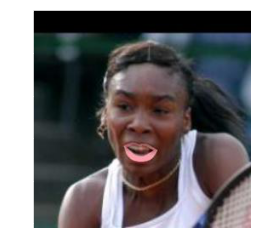

In [34]:
df_gender_res = deepface_gender_test(TEST_GENDER)

In [35]:
result_new = pd.DataFrame([df_gender_res])

frames = [result_gui_gender, result_new]
result_gui_new = pd.concat(frames)

result_gui_new = result_gui_new.reset_index()
result_gui_new.drop(columns=['index'], inplace=True)
result_gui_new

,Data directory,Gender
0,./data/LFW/Luis_Ernesto_Derbez_Bautista/Luis_E...,Man
1,./data/LFW/Angelina_Jolie/Angelina_Jolie_0002.jpg,Woman
2,./data/LFW_gender_makeup_light/Male/Junichiro_...,Man
3,./data/LFW_gender_makeup_light/Female/Mariange...,Woman
4,./data/LFW_gender_makeup_light/Male/Vicente_Fo...,Man
5,./data/LFW_gender_makeup_light/Female/Venus_Wi...,Man


In [36]:
# Output result to CSV and read results
# result_gui_new_fr.to_csv("./result/deepface_gui_face_recognition.csv", index=False)
result_gui_new.to_csv("./result/deepface_gui_gender.csv", index=False)
result_gui_gender = pd.read_csv('./result/deepface_gui_gender.csv')

#### Deepface Facial Recognition with verification: 
- Verifies the face given 2 or more face images

In [14]:
def deepface_face_recognition_test(gender):
    ### MANUAL SETTING ###
    if gender != "":
        data_people = f"./data/{DATASET}/{TEST_GENDER}/{IMAGE_NAME}"        
    else:
        raise Exception("Gender is neither Male or Female")

    # Get the images from the person
    data_images = []
    for image in os.listdir(data_people):
        data_images.append(f"{data_people}/{image}")
        
    # Test Deepface face recognition with face verification 
    truth = []
    if len(data_images) > 1:
        face_image = data_images[0]
        
        for image in data_images[1:]:
            print("\n" + face_image)
            print(image)
            data_res = DeepFace.verify(face_image, image, model_name = MODEL, 
                                        distance_metric = METRIC, detector_backend = BACKEND[0], enforce_detection=False)
                                        
            print(data_res["verified"])
            truth.append(data_res["verified"])
    else:
        raise Exception("Image folder contains less than 2 images")

    # Print the results of face verification
    accuracy = round(sum(truth) / (len(data_images)-1), 2) * 100
    print(f"\nAccuracy of {MODEL} is {accuracy}% for {gender}")

    return {"Model": MODEL, "Accuracy": accuracy, "Gender": gender}

In [37]:
df_face_recognition_res = deepface_face_recognition_test(TEST_GENDER)


./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0001.jpg
./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0002.jpg
1/1 [==============================] - 0s 64ms/step
True

./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0001.jpg
./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0003.jpg
1/1 [==============================] - 0s 65ms/step
True

./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0001.jpg
./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0004.jpg
1/1 [==============================] - 0s 61ms/step
True

./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0001.jpg
./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0005.jpg
1/1 [==============================] - 0s 78ms/step
True

./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0001.jpg
./data/LFW_gender_makeup_light/Female/Venus_Williams/Venus_Williams_0006.j

## Output and read results to CSV

In [38]:
result_new = pd.DataFrame([df_face_recognition_res])

frames = [result_gui_face_recognition, result_new]
result_gui_new_fr = pd.concat(frames)

result_gui_new_fr = result_gui_new_fr.reset_index()
result_gui_new_fr.drop(columns=['index'], inplace=True)
result_gui_new_fr

,Model,Accuracy,Gender
0,Facenet512,100.0,Male
1,Facenet512,95.0,Female
2,Facenet512,98.0,Male
3,Facenet512,100.0,Female
4,Facenet512,94.0,Male
5,Facenet512,100.0,Female


In [32]:
# Output result to CSV and read results
result_gui_new_fr.to_csv("./result/deepface_gui_face_recognition.csv", index=False)
result_gui_face_recognition = pd.read_csv('./result/deepface_gui_face_recognition.csv')